In [1]:
import numpy as np

file_path = "./data/pred.npy"
key_states = np.load(file_path)  # Load the .npy file

print("Loaded key states:", key_states.shape)

Loaded key states: (1, 32, 2664, 64)


In [3]:
one_head = key_states[:,0,:,:].squeeze()
print(f"one_head shape: {one_head.shape}")

one_head shape: (2664, 64)


In [12]:
# K means
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.metrics import silhouette_score

# Normalize the data to unit vectors for cosine similarity
one_head_normalized = normalize(one_head, axis=1)

# Perform k-means clustering
for k in range(2, 21):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")  # Set number of clusters and random state
    kmeans.fit(one_head_normalized)
    
    # # Access the results
    # cluster_centers = kmeans.cluster_centers_  # Cluster centers in normalized space
    # labels = kmeans.labels_  # Cluster labels for each data point
    
    silhouette_avg = silhouette_score(one_head_normalized, kmeans.labels_, metric="cosine")
    print(f"{k} clusters, silhouette Score (Cosine Distance): {silhouette_avg}")

2 clusters, silhouette Score (Cosine Distance): 0.087671270648966
3 clusters, silhouette Score (Cosine Distance): 0.07789711860470047
4 clusters, silhouette Score (Cosine Distance): 0.0596252094361434
5 clusters, silhouette Score (Cosine Distance): 0.0661363743563617
6 clusters, silhouette Score (Cosine Distance): 0.06644677159094071
7 clusters, silhouette Score (Cosine Distance): 0.056859328357960384
8 clusters, silhouette Score (Cosine Distance): 0.05699723210906062
9 clusters, silhouette Score (Cosine Distance): 0.05448862937277628
10 clusters, silhouette Score (Cosine Distance): 0.053292891135382686
11 clusters, silhouette Score (Cosine Distance): 0.050195463270147886
12 clusters, silhouette Score (Cosine Distance): 0.04906397700281237
13 clusters, silhouette Score (Cosine Distance): 0.04749120396169326
14 clusters, silhouette Score (Cosine Distance): 0.04657460797283719
15 clusters, silhouette Score (Cosine Distance): 0.04497974983517458
16 clusters, silhouette Score (Cosine Dista

In [28]:
# random planes
np.random.seed(42)

one_head_normalized = normalize(one_head, axis=1)  # Normalize for cosine similarity

random_planes = np.random.randn(6, 128) 
dot_products = np.dot(one_head_normalized, random_planes.T)  # Shape: (32768, 4)
binary_hash = (dot_products > 0).astype(int)  # Shape: (32768, 4)
cluster_indices = np.packbits(binary_hash, axis=1, bitorder='little')[:, 0]  # Shape: (32768,)

silhouette_avg = silhouette_score(one_head_normalized, cluster_indices, metric="cosine")
uniq, counts = np.unique(cluster_indices, return_counts=True)
print(f"Silhouette Score: {silhouette_avg}")
print(uniq, counts)

Silhouette Score: -0.17585249479710038
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 42 43 44 46 47 50 51 52
 54 55 58 60 62 63] [  566    41  4439   140  1681   249 14840  1477    58     1   228     3
   119     1   725    25    40     1   489    27    88    14  1780   190
     2    35     2    17     1    94     4    34     1   498     8   252
    21  3615   208     1    21     1    38   221     3    43     1     7
   360    36     3     2    16     1]


In [9]:
# random assign
np.random.seed(42)
one_head_normalized = normalize(one_head, axis=1)
cluster_indices = np.random.randint(5,16,size=(32768,))
silhouette_avg = silhouette_score(one_head_normalized, cluster_indices, metric="cosine")
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: -0.006293656479882519


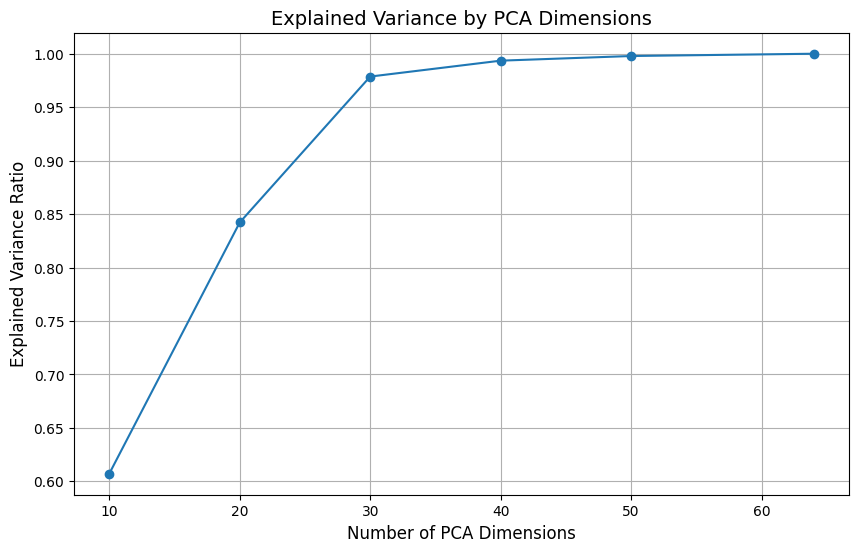

[0.6071537, 0.84215426, 0.97863615, 0.99350977, 0.99785656, 1.0]

In [5]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

np.random.seed(42)

# List of target dimensions for PCA
target_dimensions = [10, 20, 30, 40, 50, 64]

# Store the explained variance ratios for each target dimension
explained_variances = []

# Apply PCA for each target dimension
for dim in target_dimensions:
    pca = PCA(n_components=dim)
    pca.fit(one_head)
    explained_variances.append(np.sum(pca.explained_variance_ratio_))

# Plot the explained variance coverage
plt.figure(figsize=(10, 6))
plt.plot(target_dimensions, explained_variances, marker='o')
plt.title("Explained Variance by PCA Dimensions", fontsize=14)
plt.xlabel("Number of PCA Dimensions", fontsize=12)
plt.ylabel("Explained Variance Ratio", fontsize=12)
plt.grid(True)
plt.show()

# Output the explained variance values for each dimension
explained_variances

In [22]:
np.random.seed(42)

one_head_normalized = normalize(one_head, axis=1)  # Normalize for cosine similarity

random_planes = np.random.randn(5, 128) 
dot_products = np.dot(one_head_normalized, random_planes.T)

for k in range(2, 21):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")  # Set number of clusters and random state
    kmeans.fit(dot_products)
    
    # # Access the results
    # cluster_centers = kmeans.cluster_centers_  # Cluster centers in normalized space
    # labels = kmeans.labels_  # Cluster labels for each data point
    
    silhouette_avg = silhouette_score(one_head_normalized, kmeans.labels_, metric="cosine")
    print(f"{k} clusters, silhouette Score (Cosine Distance): {silhouette_avg}")

2 clusters, silhouette Score (Cosine Distance): 0.029747622930958378
3 clusters, silhouette Score (Cosine Distance): 0.021364828007273417
4 clusters, silhouette Score (Cosine Distance): 0.012787122806650314
5 clusters, silhouette Score (Cosine Distance): 0.007007981985676123
6 clusters, silhouette Score (Cosine Distance): 0.0035534996361973525
7 clusters, silhouette Score (Cosine Distance): -0.0025393686823568466
8 clusters, silhouette Score (Cosine Distance): -0.006633010643890729
9 clusters, silhouette Score (Cosine Distance): -0.00923551893994795
10 clusters, silhouette Score (Cosine Distance): -0.010396944181681642
11 clusters, silhouette Score (Cosine Distance): -0.011447128131049537
12 clusters, silhouette Score (Cosine Distance): -0.01277642598242383
13 clusters, silhouette Score (Cosine Distance): -0.013508331839073245
14 clusters, silhouette Score (Cosine Distance): -0.013962982999485129
15 clusters, silhouette Score (Cosine Distance): -0.015429938889138772
16 clusters, silhou

In [1]:
import torch

def repeat_kv(hidden_states: torch.Tensor, n_rep: int) -> torch.Tensor:
    """
    This is the equivalent of torch.repeat_interleave(x, dim=1, repeats=n_rep). The hidden states go from (batch,
    num_key_value_heads, seqlen, head_dim) to (batch, num_attention_heads, seqlen, head_dim)
    """
    batch, num_key_value_heads, slen, head_dim = hidden_states.shape
    if n_rep == 1:
        return hidden_states
    hidden_states = hidden_states[:, :, None, :, :].expand(batch, num_key_value_heads, n_rep, slen, head_dim)
    return hidden_states.reshape(batch, num_key_value_heads * n_rep, slen, head_dim)

In [4]:
a = torch.tensor([[[[1,2,3]],[[3,2,1]]]])
print("a shape", a.shape)
ra = repeat_kv(a,3)
print(ra)

a shape torch.Size([1, 2, 1, 3])
tensor([[[[1, 2, 3]],

         [[1, 2, 3]],

         [[1, 2, 3]],

         [[3, 2, 1]],

         [[3, 2, 1]],

         [[3, 2, 1]]]])


In [13]:
hash_values = torch.tensor([[[1,1,1,2,2],[2,1,2,2,1]]])
print(hash_values.shape)
attn_sum = torch.tensor([[[7.5,3.4,0.8,6.2,9.1],[9.5,0.3,2.5,2.2,1.2]]])
print(attn_sum[:, 0, :].shape)

torch.Size([1, 2, 5])
torch.Size([1, 5])


In [23]:
def head_eviction(hash, attn, head_idx, evict_num):
        unique_values, inverse_indices, counts = torch.unique(
            hash[:, head_idx, :], return_inverse=True, return_counts=True
        )
        frequencies = counts.float() / counts.sum()  # Frequency of each unique hash value
        evict_num_per_hash = (frequencies * evict_num).floor().long()  # Dynamic K values (one per unique hash)

        num_unique = unique_values.size(0)
        inverse_indices_expanded = inverse_indices.view(1, -1)  # Expand for broadcasting
        mask = inverse_indices_expanded == torch.arange(num_unique, device=hash.device).view(-1, 1)

        attn_sums_per_unique = torch.where(
            mask, attn[:, head_idx, :].expand(num_unique, -1), torch.tensor(float('inf'), device=hash.device)
        )

        evict_id_per_head = torch.empty(evict_num_per_hash.sum().item(), dtype=torch.long, device=hash.device)
        start_idx = 0
        for i in range(num_unique):
            k = evict_num_per_hash[i]  # Dynamic K for this unique value
            if k > 0:
                # Use `largest=False` to select smallest K values
                _, topk_indices = torch.topk(attn_sums_per_unique[i], k=k, largest=False)
                evict_id_per_head[start_idx:start_idx + k] = topk_indices
                start_idx += k

        return evict_id_per_head

In [40]:
# evict_ids = []
# for i in range(hash_values.shape[1]):
#                 evict_id_per_head = head_eviction(hash_values, attn_sum, i, 3)
#                 evict_ids.append(evict_id_per_head)
# print(evict_ids)

evict_ids = torch.tensor([[3,2], [1,3]])
min_evict_tokens = min(len(evict_id_per_head) for evict_id_per_head in evict_ids)
print(min_evict_tokens)
aligned_evict_ids = torch.stack([
                evict_id_per_head[:min_evict_tokens]
                for evict_id_per_head in evict_ids
            ])
print(aligned_evict_ids)

keep_indices = torch.ones(
                (2, 5), 
                dtype=torch.bool)
keep_indices.scatter_(1, aligned_evict_ids, False) 
print(keep_indices)

valid_indices = torch.masked_select(
    torch.arange(5).unsqueeze(0).expand(2, -1), 
    keep_indices
).view(2, -1)
print(valid_indices)
key_states = torch.tensor([[[[1,2,3],[4,5,6],[7,8,9],[10,11,12],[13,14,15]],
                           [[-1,-2,-3],[-4,-5,-6],[-7,-8,-9],[-10,-11,-12],[-13,-14,-15]]]])
print(key_states.shape)

reduced_key_state = key_states.gather(
        dim=2,
        index=valid_indices.unsqueeze(0).unsqueeze(-1).expand(key_states.shape[0], -1, -1, key_states.shape[-1])
    )
print(reduced_key_state)
print(reduced_key_state.shape)

2
tensor([[3, 2],
        [1, 3]])
tensor([[ True,  True, False, False,  True],
        [ True, False,  True, False,  True]])
tensor([[0, 1, 4],
        [0, 2, 4]])
torch.Size([1, 2, 5, 3])
tensor([[[[  1,   2,   3],
          [  4,   5,   6],
          [ 13,  14,  15]],

         [[ -1,  -2,  -3],
          [ -7,  -8,  -9],
          [-13, -14, -15]]]])
torch.Size([1, 2, 3, 3])


In [20]:
import torch

# Assume hash_values and attn_sum are tensors of shape (b, num_heads, #key_states)
# and `topk` is the number of indices you want to retrieve for each unique value

b, num_heads, num_key_states = hash_values.shape
head_idx = 0
num_tokens = 3

unique_values, inverse_indices, counts = torch.unique(
    hash_values[:, head_idx, :], return_inverse=True, return_counts=True
)

print(unique_values)
print(inverse_indices)
print(counts)

frequencies = counts.float() / counts.sum()  # Frequency of each unique hash value
evict_num_per_hash = (frequencies * num_tokens).floor().long()  # Dynamic K values (one per unique hash)

print(frequencies)
print(evict_num_per_hash)

num_unique = unique_values.size(0)
inverse_indices_expanded = inverse_indices.view(1, -1)  # Expand for broadcasting
mask = inverse_indices_expanded == torch.arange(num_unique, device=hash_values.device).view(-1, 1)

print(inverse_indices_expanded)
print(mask)

attn_sums_per_unique = torch.where(
    mask, attn_sum[:, head_idx, :].expand(num_unique, -1), torch.tensor(float('inf'), device=hash_values.device)
)
print(attn_sums_per_unique)

evict_id_per_head = torch.empty(evict_num_per_hash.sum().item(), dtype=torch.long, device=hash_values.device)
start_idx = 0

for i in range(num_unique):
    k = evict_num_per_hash[i]  # Dynamic K for this unique value
    if k > 0:
        # Use `largest=False` to select smallest K values
        topk_values, topk_indices = torch.topk(attn_sums_per_unique[i], k=k, largest=False)

        # Insert the topk_indices into the preallocated result tensor
        evict_id_per_head[start_idx:start_idx + k] = topk_indices
        start_idx += k

print(evict_id_per_head+10)

tensor([1, 2])
tensor([[0, 0, 0, 1, 1]])
tensor([3, 2])
tensor([0.6000, 0.4000])
tensor([1, 1])
tensor([[0, 0, 0, 1, 1]])
tensor([[ True,  True,  True, False, False],
        [False, False, False,  True,  True]])
tensor([[7.5000, 3.4000, 0.8000,    inf,    inf],
        [   inf,    inf,    inf, 6.2000, 9.1000]])
tensor([12, 13])
